In [1]:
%matplotlib inline

In [2]:
import json
path = '/Users/jakewhite/Documents/Training/Python For Data Analysis/gov_bitly_data.txt'

In [3]:
records = [json.loads(line) for line in open(path, 'rb')]

In [4]:
records[0]['tz']

u'America/Bogota'

In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [6]:
from pandas import DataFrame, Series
import pandas as pd

In [7]:
df = DataFrame(records)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 1838
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              1719 non-null object
al             1525 non-null object
c              1443 non-null object
cy             1443 non-null object
g              1719 non-null object
gr             1443 non-null object
h              1719 non-null object
hc             1719 non-null float64
hh             1719 non-null object
kw             66 non-null object
l              1719 non-null object
ll             1440 non-null object
nk             1719 non-null float64
r              1719 non-null object
t              1719 non-null float64
tz             1719 non-null object
u              1719 non-null object
dtypes: float64(4), object(14)
memory usage: 273.0+ KB


In [9]:
tz_counts = df['tz'].value_counts()

In [10]:
tz_counts[:10]  # sorted automatically

America/New_York        475
                        280
America/Chicago         255
America/Los_Angeles     188
Europe/London           101
America/Denver           58
America/Phoenix          32
Asia/Tokyo               25
America/Rainy_River      21
America/Indianapolis     18
dtype: int64

In [11]:
clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()

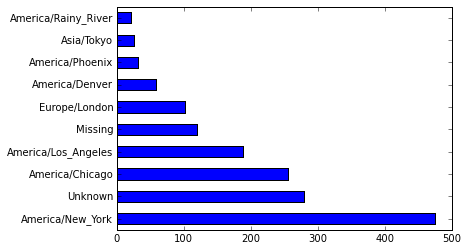

In [12]:
tz_counts[:10].plot(kind='barh', rot=0)

In [13]:
browser = Series([x.split()[0] for x in df.a.dropna()])
browser[:5]

0    MOT-MB525/Blur_Version.34.4.802.MB525.AmericaM...
1                                                ZXing
2                                          Mozilla/5.0
3                                          Mozilla/5.0
4                                          Mozilla/4.0
dtype: object

In [14]:
browser.value_counts()[:10]

Mozilla/5.0                 1421
Mozilla/4.0                  154
ShortLinkTranslate            38
GoogleProducer;               18
WebTrends/3.0                 17
Opera/9.80                    11
Kml-Google;                    8
TVersity                       6
BlackBerry9700/5.0.0.351       5
JetBrains                      4
dtype: int64

In [15]:
cframe = df[df.a.notnull()]

In [16]:
import numpy as np

In [17]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [18]:
by_tz_os= cframe.groupby(['tz', operating_system])

In [19]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [20]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,189,91
Africa/Cairo,0,1
Africa/Casablanca,1,0
Africa/Ceuta,1,2
Africa/Johannesburg,3,0
America/Anchorage,2,1
America/Argentina/Buenos_Aires,0,3
America/Argentina/Cordoba,1,1
America/Aruba,1,0


In [21]:
indexer = agg_counts.sum(1).argsort()

In [22]:
indexer[:10]

tz
                                  52
Africa/Cairo                      40
Africa/Casablanca                 27
Africa/Ceuta                      21
Africa/Johannesburg               46
America/Anchorage                 19
America/Argentina/Buenos_Aires    39
America/Argentina/Cordoba         38
America/Aruba                     73
America/Bogota                    72
dtype: int64

In [23]:
count_subset = agg_counts.take(indexer)[-10:]

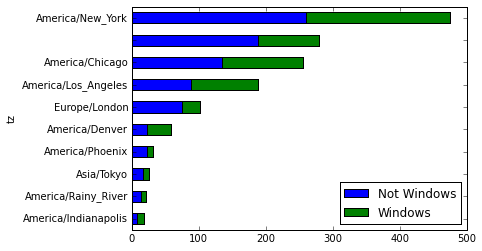

In [24]:
count_subset.plot(kind='barh', stacked=True)

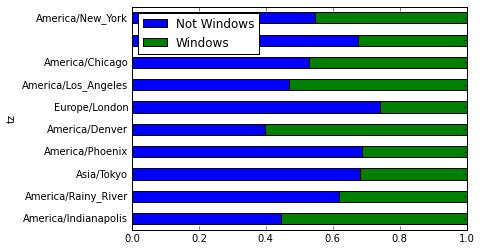

In [25]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

# 20150807- p. 24

In [26]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

In [27]:
users = pd.read_table('movielens/users.dat', sep='::', header=None, names=unames)
ratings = pd.read_table('movielens/users.dat', sep='::', header=None, names=rnames)
movies = pd.read_table('movielens/users.dat', sep='::', header=None, names=mnames)

//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [28]:
users[:5], ratings[:5], movies[:5]

(   user_id gender  age  occupation    zip
 0        1      F    1          10  48067
 1        2      M   56          16  70072
 2        3      M   25          15  55117
 3        4      M   45           7  02460
 4        5      M   25          20  55455,
   user_id  movie_id  rating timestamp
 1       F         1      10     48067
 2       M        56      16     70072
 3       M        25      15     55117
 4       M        45       7     02460
 5       M        25      20     55455,
      movie_id  title genres
 1 F         1     10  48067
 2 M        56     16  70072
 3 M        25     15  55117
 4 M        45      7  02460
 5 M        25     20  55455)

In [29]:
data = pd.merge(ratings, users)

In [30]:
help(df.ix)

Help on _IXIndexer in module pandas.core.indexing object:

class _IXIndexer(_NDFrameIndexer)
 |  A primarily label-location based indexer, with integer position
 |  fallback.
 |  
 |  ``.ix[]`` supports mixed integer and label based access. It is
 |  primarily label based, but will fall back to integer positional
 |  access unless the corresponding axis is of integer type.
 |  
 |  ``.ix`` is the most general indexer and will support any of the
 |  inputs in ``.loc`` and ``.iloc``. ``.ix`` also supports floating
 |  point label schemes. ``.ix`` is exceptionally useful when dealing
 |  with mixed positional and label based hierachical indexes.
 |  
 |  However, when an axis is integer based, ONLY label based access
 |  and not positional access is supported. Thus, in such cases, it's
 |  usually better to be explicit and use ``.iloc`` or ``.loc``.
 |  
 |  See more at :ref:`Advanced Indexing <advanced>`.
 |  
 |  Method resolution order:
 |      _IXIndexer
 |      _NDFrameIndexer
 |    

## 8-10-15

In [31]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [32]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [33]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [34]:
years = range(1880, 2015)

data = []
for year in years:
    path = 'names/yob%d.txt' % year
    yearData = pd.read_csv(path, names=['name', 'sex', 'births'])
    yearData['year'] = year
    data.append(yearData)
    
names = pd.concat(data, ignore_index=True)

In [35]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825433 entries, 0 to 1825432
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 69.6+ MB


In [36]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=np.sum)

In [37]:
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


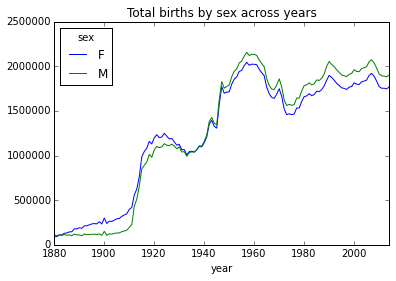

In [38]:
total_births.plot(title='Total births by sex across years')

In [39]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [40]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [41]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [42]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby (['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [43]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


##8-11-15

In [44]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [46]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [47]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1880 to 2014
Columns: 7031 entries, Aaden to Zuri
dtypes: float64(7031)
memory usage: 7.2 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x118eaeb50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b74d990>], dtype=object)

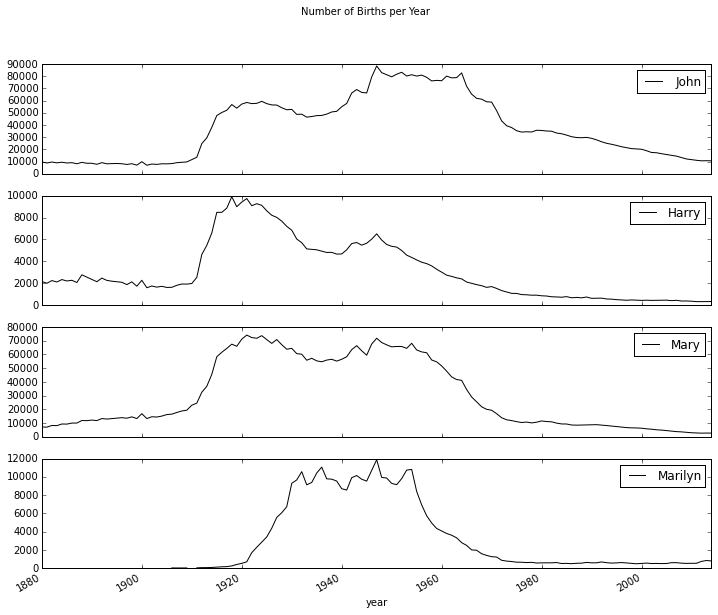

In [49]:
subset=total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of Births per Year")

In [52]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

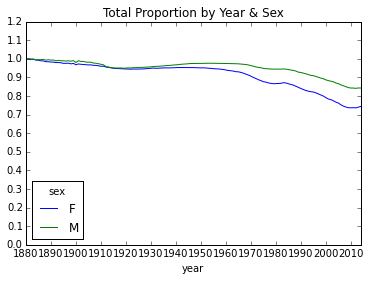

In [54]:
table.plot(title="Total Proportion by Year & Sex", yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10))

In [57]:
df2010 = boys[boys.year == 2010]
df2010.tail(5)

,name,sex,births,year,prop
261872,Simeon,M,196,2010,0.000102
261873,Reuben,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102
261875,Joziah,M,196,2010,0.000102
261876,Eliezer,M,196,2010,0.000102


In [58]:
prop_cumsum = df2010.sort_index(by='prop', ascending=False).prop.cumsum()

In [62]:
prop_cumsum.values.searchsorted(.5)

116

In [63]:
df1900 = boys[boys.year == 1900]
df1900.sort_index(by='prop', ascending=False).prop.cumsum().values.searchsorted(.5) + 1


25

In [65]:
def get_quantile_counts(group, q=.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(.5) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_counts)

In [68]:
diversity = diversity.unstack('sex')

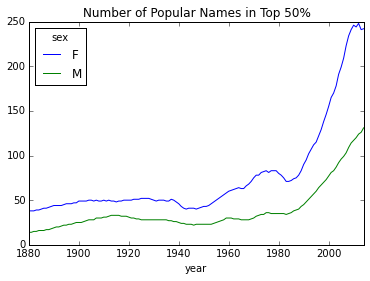

In [69]:
diversity.plot(title="Number of Popular Names in Top 50%")

In [70]:
# Last letter analysis (p. 37)

get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.names = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [72]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [73]:
subtable.head(5)

sex        F                      M                
year    1910    1960    2010   1910    1960    2010
name                                               
a     108397  691245  675901    977    5214   28814
b        NaN     694     454    411    3912   39208
c          5      49     953    482   15466   23307
d       6751    3728    2635  22113  262143   44758
e     133601  435048  316288  28665  178810  130073

In [74]:
letter_prop = subtable / subtable.sum().astype(float)

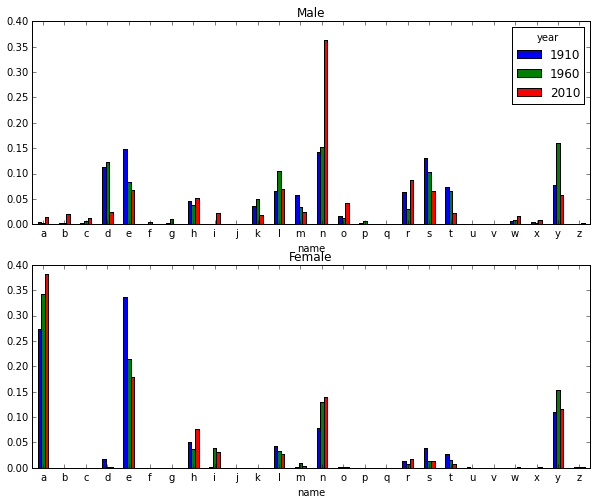

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

## 8-11-15

In [76]:
letter_prop = table / table.sum().astype(float)

In [80]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [81]:
dny_ts.head()

name,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083240,0.153209,0.077453
1882,0.085339,0.149558,0.077537
1883,0.084059,0.151650,0.079146
1884,0.086120,0.149924,0.080405


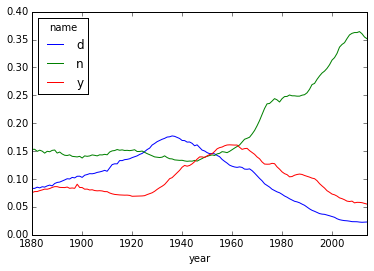

In [82]:
dny_ts.plot()

In [83]:
help(letter_prop.ix)

Help on _IXIndexer in module pandas.core.indexing object:

class _IXIndexer(_NDFrameIndexer)
 |  A primarily label-location based indexer, with integer position
 |  fallback.
 |  
 |  ``.ix[]`` supports mixed integer and label based access. It is
 |  primarily label based, but will fall back to integer positional
 |  access unless the corresponding axis is of integer type.
 |  
 |  ``.ix`` is the most general indexer and will support any of the
 |  inputs in ``.loc`` and ``.iloc``. ``.ix`` also supports floating
 |  point label schemes. ``.ix`` is exceptionally useful when dealing
 |  with mixed positional and label based hierachical indexes.
 |  
 |  However, when an axis is integer based, ONLY label based access
 |  and not positional access is supported. Thus, in such cases, it's
 |  usually better to be explicit and use ``.iloc`` or ``.loc``.
 |  
 |  See more at :ref:`Advanced Indexing <advanced>`.
 |  
 |  Method resolution order:
 |      _IXIndexer
 |      _NDFrameIndexer
 |    

In [85]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [87]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    375129
Lesly      11429
Name: births, dtype: int64

In [90]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2010,1,NaN
2011,1,NaN
2012,1,NaN
2013,1,NaN
2014,1,NaN


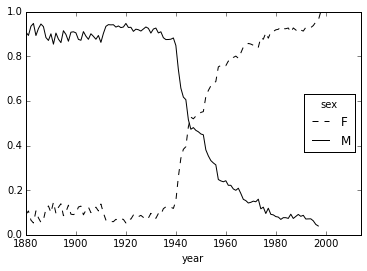

In [92]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [93]:
%quickref